In [1]:
'''pregnancies
glucose
blood pressure
skin thickness
insulin
BMI
Diabetes Pedigree Function
Age
Outcome'''

'pregnancies\nglucose\nblood pressure\nskin thickness\ninsulin\nBMI\nDiabetes Pedigree Function\nAge\nOutcome'

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# data preparation

## training data
X_train_df = pd.read_csv('Diabetes_Xtrain.csv')
Y_train_df = pd.read_csv('Diabetes_Ytrain.csv')

X_train = X_train_df.values
Y_train = Y_train_df.values
Y_train = Y_train[:,0]

In [5]:
# data understanding
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               576 non-null    int64  
 1   Glucose                   576 non-null    int64  
 2   BloodPressure             576 non-null    int64  
 3   SkinThickness             576 non-null    int64  
 4   Insulin                   576 non-null    int64  
 5   BMI                       576 non-null    float64
 6   DiabetesPedigreeFunction  576 non-null    float64
 7   Age                       576 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 36.1 KB


In [6]:
Y_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Outcome  576 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


In [8]:
np.unique(Y_train)

array([0, 1], dtype=int64)

In [87]:
## testing data
X_test_df = pd.read_csv('Diabetes_Xtest.csv')

X_test = X_test_df.values

In [88]:
# knn function
def dist(x1, x2):
    return np.sqrt(sum((x1 - x2)**2))

def knn(X, Y, queryPoint, k = 7):
    
    val = []
    size = X.shape[0]
    
    for i in range(size):
        d = dist(queryPoint, X[i])
        val.append((d, Y[i]))
        
    val = sorted(val)
    
    # take first k value
    val = val[:k]
    
    # convert list to numpy array
    val = np.array(val)
    
    # find unique output and there frequency
    counts = np.unique(val[:,1], return_counts=True)
    
    index = counts[1].argmax()
    pred = counts[0][index]
    
    return pred

In [90]:
knn(X_train, Y_train, X_test[0])

1.0

In [94]:
# exporting all the predictions as csv
test_size = X_test.shape[0]
lst = []

for i in range(test_size):
    pred = knn(X_train, Y_train, X_test[i])
    lst.append(int(pred))
    print("", i, end = "\r")
    
outcome = {
    "outputs": np.array(lst)
}

df = pd.DataFrame(outcome, dtype = 'uint8')
df.to_csv('output.csv', index = False)

In [102]:
Xt, Xv, Yt, Yv = train_test_split(X_train, Y_train, test_size=0.2)

In [92]:
from sklearn.model_selection import train_test_split
import tqdm

In [105]:
Yp_knn = []
for i in range(Xv.shape[0]):
    pred = knn(Xt, Yt, Xv[i])
    Yp_knn.append(int(pred))
    
Yp_knn = np.asarray(Yp_knn)

# classification using neural network (MLP)

In [50]:
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [122]:
mlp_model = Sequential()
mlp_model.add(Input(X_train.shape[1]))
mlp_model.add(Dense(24, activation='relu'))
mlp_model.add(Dense(24, activation='relu'))
mlp_model.add(Dense(1, activation='sigmoid')) # its binary classification problem
mlp_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [123]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=9, restore_best_weights=True)

In [124]:
# print("no of samples: %d" %X_train.shape[0])
hist = mlp_model.fit(Xt, Yt, epochs=90, validation_split=0.2, use_multiprocessing=True, callbacks=[early_stop])

Epoch 1/90
12/12 [==============================] - 5s 133ms/step - loss: 15.9208 - accuracy: 0.3152 - val_loss: 8.8715 - val_accuracy: 0.4457
Epoch 2/90
12/12 [==============================] - 1s 60ms/step - loss: 7.4769 - accuracy: 0.3288 - val_loss: 3.3630 - val_accuracy: 0.4348
Epoch 3/90
12/12 [==============================] - 1s 61ms/step - loss: 2.7437 - accuracy: 0.5054 - val_loss: 3.3934 - val_accuracy: 0.5109
Epoch 4/90
12/12 [==============================] - 1s 71ms/step - loss: 2.0397 - accuracy: 0.6549 - val_loss: 1.7645 - val_accuracy: 0.6087
Epoch 5/90
12/12 [==============================] - 1s 72ms/step - loss: 1.3618 - accuracy: 0.5870 - val_loss: 1.4492 - val_accuracy: 0.5543
Epoch 6/90
12/12 [==============================] - 1s 59ms/step - loss: 1.2149 - accuracy: 0.6060 - val_loss: 1.4966 - val_accuracy: 0.6087
Epoch 7/90
12/12 [==============================] - 1s 63ms/step - loss: 1.0253 - accuracy: 0.6223 - val_loss: 1.2553 - val_accuracy: 0.5870
Epoch 8/90


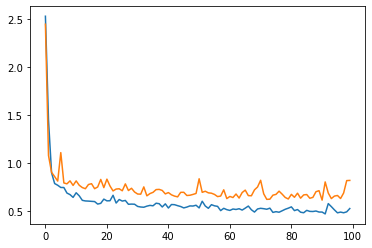

In [35]:
plt.plot(hist.history['loss'], label="training loss")
plt.plot(hist.history['val_loss'], label="validation loss")
plt.show()

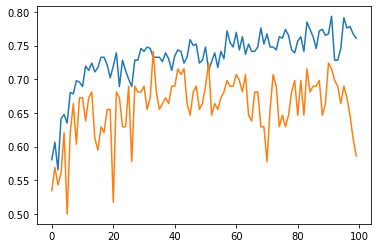

In [34]:
plt.plot(hist.history['accuracy'], label="training loss")
plt.plot(hist.history['val_accuracy'], label="validation loss")
plt.show()

In [36]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [37]:
# the accuracy on validation set is just about 70%
# which is not great at all

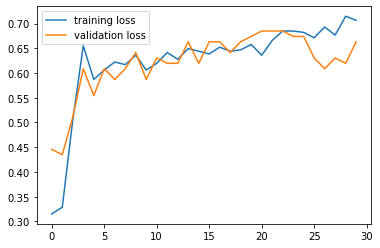

In [125]:
plt.plot(hist.history['accuracy'], label="training loss")
plt.plot(hist.history['val_accuracy'], label="validation loss")
plt.legend()
plt.show()

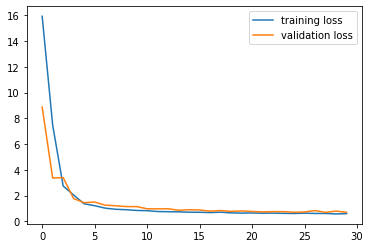

In [126]:
plt.plot(hist.history['loss'], label="training loss")
plt.plot(hist.history['val_loss'], label="validation loss")
plt.legend()
plt.show()

In [127]:
Yp_mlp = mlp_model.predict_on_batch(Xv)

In [129]:
print(Yp_knn.shape, Yp_mlp.shape)

(116,) (116, 1)


# Logistic Regression

In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
lr_model = LogisticRegression(solver='liblinear')

In [133]:
print(X_train.shape, Y_train.shape)

(576, 8) (576,)


In [134]:
lr_model.fit(Xt, Yt)

LogisticRegression(solver='liblinear')

In [135]:
theta0 = lr_model.intercept_
thetas = lr_model.coef_

In [136]:
print(theta0, thetas)

[-5.50467124] [[ 1.01192671e-01  2.85998608e-02 -1.51401748e-02 -3.11098662e-03
  -7.32672065e-04  5.78998719e-02  8.10766477e-01 -3.65700539e-03]]


In [137]:
Yp_lr = lr_model.predict(Xv)

In [139]:
Yp_lr = Yp_lr.reshape(-1, 1)

In [141]:
print(Yp_lr.shape)

(116, 1)


# Decision Tree - SkLearn

In [379]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
#from sklearn.metrics import 

In [380]:
sk_decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth=7)

In [381]:
sk_decision_tree.fit(Xt, Yt)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [382]:
sk_decision_tree.score(Xv, Yv)

0.6379310344827587

# Decision Tree

In [254]:
def entropy(Y):
    total = Y.shape[0]
    counts = np.unique(Y, return_counts=True)[1]
    probs = np.asarray(counts) / total
    randomness = -1.0 * np.sum(probs*np.log2(probs))
    
    return randomness
    
# helper function - split dataset along a feature 
def divide_data(X, Y, split_key):
    """
    func desc; divide data is a helper function that splits data along the split_key
    params; X: feature values of the dataset
    params; Y: labels of the dataset
    params; split_key: the index of a feature to split the dataset
    """
    X_left, X_right = [], []
    Y_left, Y_right = [], []
    
    for i in range(X.shape[0]):
        if X[i, split_key] > np.mean(X[:, split_key]):
            X_right.append(X[i])
            Y_right.append(Y[i])
        else:
            X_left.append(X[i])
            Y_left.append(Y[i])
    
    return np.asarray(X_left), np.asarray(Y_left), np.asarray(X_right), np.asarray(Y_right)
    
def info_gain(X, Y, split_key):
    X_left, Y_left, X_right, Y_right = divide_data(X, Y, split_key)
    
    # this is a leaf case - all data are in one side
    if X_left.shape[0] == 0 or X_right.shape[0] == 0:
        # here info gain is neglibile(-infinity)
        return -1000000

    left_ig = (Y_left.shape[0] / Y.shape[0]) * entropy(Y_left)
    right_ig = (Y_right.shape[0] / Y.shape[0]) * entropy(Y_right)

    ig = entropy(Y) - left_ig - right_ig
    return ig

In [231]:
igs = []

for i in range(Xt.shape[1]):
    ig = info_gain(Xt, Yt, i)
    igs.append(ig)

In [233]:
np.argmax(igs)

1

In [364]:
class DecisionTree:
    def __init__(self, max_depth=5):
        self.depth = 0
        self.max_depth = max_depth
        self.left = None
        self.right = None
        self.target = None
        self.split_key = None # this will help while predicting how to make decision
        self.split_val = None
        
    def train(self, X, Y):
        # stop condition
        if self.depth >= self.max_depth:
            if Y.mean() > 0.5:
                self.target = 1
            else:
                self.target = 0
            return
        
        igs = []
        for i in range(X.shape[1]):
            ig = info_gain(X, Y, i)
            igs.append(ig)
            
        self.split_key = np.argmax(igs)
        self.split_val = np.mean(X[:, self.split_key])
        
        X_left, Y_left, X_right, Y_right = divide_data(X, Y, self.split_key)
        
        #check if no more split are possible i.e., all data are in one side (either 0 or 1)
        if Y_left.shape[0] * Y_right.shape[0] == 0:
            if np.mean(Y) < 0.5:
                self.target = 0
            else:
                self.target = 1
            return
        
        self.left = DecisionTree(max_depth = self.max_depth-1)
        # return X_left, Y_left, X_right, Y_right
        self.left.train(X_left, Y_left)
        
        
        self.right = DecisionTree(max_depth = self.max_depth-1)
        self.right.train(X_right, Y_right)
        
        # making decision/target at every node
        if np.mean(Y) >= 0.5:
            self.target = 1
        else:
            self.target = 0
        return
    
    def predict(self, X):
        Yp = []
        #print(self.split_key, self.split_val, end=" ")
        if X[self.split_key] > self.split_val:
            #print("right: {}".format(self.right))
            if self.right.split_key is None:
                return self.target 
                Yp.append(self.target)
            else:
                return self.right.predict(X)
        else:
            #print("right: {}".format(self.right))
            if self.left.split_key is None:
                
                return self.target
                Yp.append(self.target)
            else:
                return self.left.predict(X)

In [365]:
decision_tree = DecisionTree(7)

In [366]:
decision_tree.train(Xt, Yt)

In [371]:
Yp_dt = np.zeros(Yv.shape, dtype=int)

for i in range(Xv.shape[0]):
    Yp_dt[i] = decision_tree.predict(Xv[i])    

In [372]:
Yp_dt

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0])

# Support Vector Machine

In [383]:
from sklearn import svm

In [386]:
svc = svm.SVC(kernel='linear')

In [387]:
svc.fit(Xt, Yt)

SVC(kernel='linear')

In [388]:
svc.score(Xt, Yt)

0.7934782608695652

In [389]:
Yp_svm = svc.predict(Xv)

In [391]:
svc.score(Xv, Yv)

0.7586206896551724

# SVM - rbf and polynomial kernel

In [395]:
svc_rgb = svm.SVC(kernel='rbf')
svc_rgb.fit(Xt, Yt)

SVC()

In [396]:
svc_rgb.score(Xv, Yv)

0.6982758620689655

In [397]:
svc_poly = svm.SVC(kernel='poly')
svc_poly.fit(Xt, Yt)

SVC(kernel='poly')

In [398]:
svc_poly.score(Xv, Yv)

0.7413793103448276

In [399]:
svc_sigmoid = svm.SVC(kernel='sigmoid')
svc_sigmoid.fit(Xt, Yt)

SVC(kernel='sigmoid')

In [400]:
svc_sigmoid.score(Xv, Yv)

0.47413793103448276

# Compare results - Confusion Matrix

In [74]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [150]:
from math import floor, ceil

In [392]:
conf_knn = confusion_matrix(Yv, Yp_knn) # k-nearest neighbour
conf_lr = confusion_matrix(Yv, Yp_lr) # logistic regression
conf_mlp = confusion_matrix(Yv, Yp_mlp > 0.5) # multi-layer perceptron
conf_dt = confusion_matrix(Yv, Yp_dt) # decision tree
conf_svm = confusion_matrix(Yv, Yp_svm) # support vector machine

In [393]:
cm_knn = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_knn, display_labels = [0, 1])
cm_lr = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_lr, display_labels = [0, 1])
cm_mlp = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mlp, display_labels = [0, 1])
cm_dt = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_dt, display_labels = [0, 1])
cm_svm = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_svm, display_labels = [0, 1])

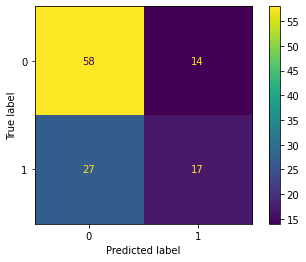

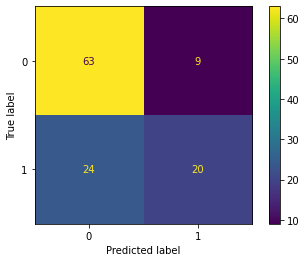

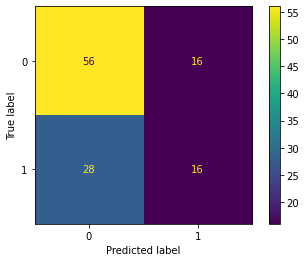

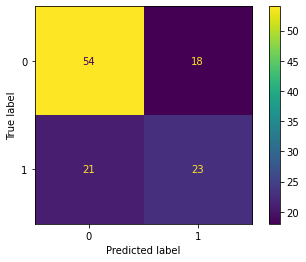

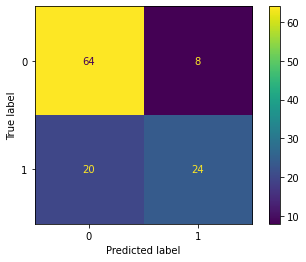

In [394]:
cm_knn.plot()
cm_lr.plot()
cm_mlp.plot()
cm_dt.plot()
cm_svm.plot()
plt.show()